In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Чтение данных

In [ ]:
data = pd.read_csv('Loan_Default.csv')

# Обработка категориальных признаков

In [ ]:
categorical_columns = [
    'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
    'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization',
    'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type',
    'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type',
    'submission_of_application', 'Region', 'Security_Type', 'age', 'Status'
]

for col in categorical_columns:
    data[col] = data[col].astype('category')

In [ ]:
data = data.set_index('ID')
data.drop('year', axis=1, inplace=True)

# Обработка пропущенных значений, нормализация данных, бинаризация номинальных признаков

In [ ]:
num_features = [
    'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
    'term', 'property_value', 'income', 'LTV', 'dtir1', 'Credit_Score'
]

cat_features = ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization',
                'age', 'submission_of_application']

imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data[num_features])

data[num_features] = imp_num.transform(data[num_features])

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data[cat_features])

data[cat_features] = imp_cat.transform(data[cat_features])

In [ ]:
norm_data = data[["loan_amount", "rate_of_interest", "Interest_rate_spread", "Upfront_charges", "term", "property_value", "income", "LTV", "dtir1", "Credit_Score"]]
scaler = StandardScaler()
scaler.fit(norm_data)
norm_data = pd.DataFrame(scaler.transform(norm_data), columns=norm_data.columns, index=norm_data.index)

In [ ]:
enc_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type',	'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial',
              'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
              'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'Region', 'Security_Type', 'age']

enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[enc_features])

dummies = pd.DataFrame(enc.transform(data[enc_features]),
                       columns=enc.get_feature_names_out(), index=data.index)

data = pd.concat((data, dummies), axis=1).drop(["loan_amount", "rate_of_interest", "Interest_rate_spread", "Upfront_charges",
                                                "term", "property_value", "income", "LTV", "dtir1", "Credit_Score"], axis=1)

data = pd.concat((norm_data, data), axis=1).drop(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type',	'loan_purpose', 'Credit_Worthiness', 'open_credit',
                                                  'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type',
                                                  'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'submission_of_application',
                                                  'Region', 'Security_Type', 'age'], axis=1)

# Задача кластеризации с использованием разных методов

In [ ]:
X_train = data.drop(['Status'], axis=1)
y_train = data['Status']

In [ ]:
X_train.shape

(148670, 56)

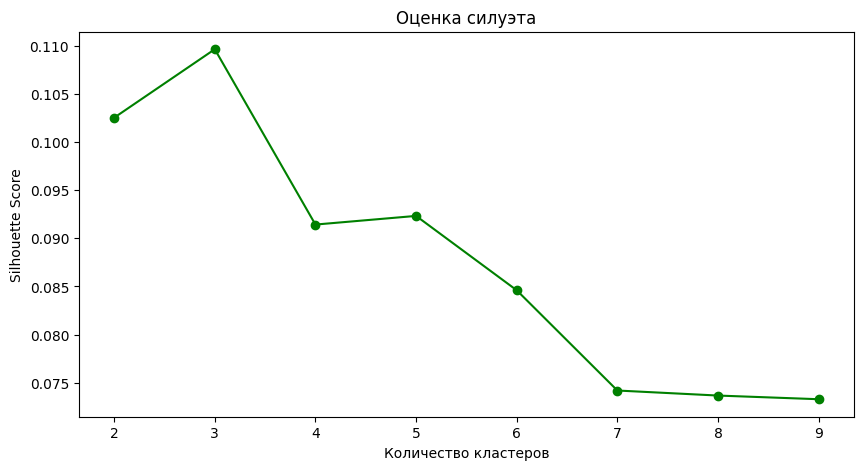

In [52]:
silhouette_scores = []
range_clusters = range(2, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', color='green')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Оценка силуэта')
plt.show()

In [53]:
# Обучение KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
predicted_clusters = kmeans.labels_

ari = adjusted_rand_score(y_train, predicted_clusters)
silhouette_avg = silhouette_score(X_train, predicted_clusters)
nmi = normalized_mutual_info_score(y_train, predicted_clusters)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI): -0.008
Silhouette Score: 0.110
Normalized Mutual Information (NMI): 0.012


In [54]:
# Обучение DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(X_train)
predicted_clusters_dbscan = dbscan.labels_

ari_dbscan = adjusted_rand_score(y_train, predicted_clusters_dbscan)
silhouette_avg_dbscan = silhouette_score(X_train, predicted_clusters_dbscan)
nmi = normalized_mutual_info_score(y_train, predicted_clusters_dbscan)

print(f"Adjusted Rand Index (ARI) для DBSCAN: {ari_dbscan:.3f}")
print(f"Silhouette Score для DBSCAN: {silhouette_avg_dbscan:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI) для DBSCAN: 0.051
Silhouette Score для DBSCAN: -0.362
Normalized Mutual Information (NMI): 0.053


In [ ]:
# Обучение AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=10)
predicted_clusters_agglo = agglomerative.fit_predict(X_train)

ari_agglo = adjusted_rand_score(y_train, predicted_clusters_agglo)
silhouette_avg_agglo = silhouette_score(X_train, predicted_clusters_agglo)
nmi_agglo = normalized_mutual_info_score(y_train, predicted_clusters_agglo)

print(f"Adjusted Rand Index (ARI) для Agglomerative Clustering: {ari_agglo:.3f}")
print(f"Silhouette Score для Agglomerative Clustering: {silhouette_avg_agglo:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi_agglo:.3f}")

Adjusted Rand Index (ARI) для Agglomerative Clustering: 0.004
Silhouette Score для Agglomerative Clustering: 0.110
Normalized Mutual Information (NMI): 0.146


# Вывод
### Метод KMeans
- Adjusted Rand Index (ARI): Отрицательное значение ARI говорит о том, что алгоритм не нашел структуры, близкой к истинным меткам.
- Silhouette Score: Положительное значение, но близкое к нулю, показывает слабую структурированность кластеров и низкую уверенность в правильности выделенных групп.
- Normalized Mutual Information (NMI): Очень низкое значение NMI указывает на слабую зависимость между полученными кластерами и истинными метками.

Метод KMeans плохо справился с задачей кластеризации для этих данных.
### Метод DBSCAN
- Adjusted Rand Index (ARI): Положительное, но низкое значение ARI говорит о том, что DBSCAN чуть лучше случайного распределения, но все еще далеко от хорошего соответствия истинным меткам.
- Silhouette Score: Отрицательное значение силуэта указывает на то, что многие объекты отнесены не в те кластеры, к которым они "ближе", что свидетельствует о плохой кластеризации.
- Normalized Mutual Information (NMI): Низкое значение NMI указывает на слабую связь между кластерами и истинными метками.

Метод DBSCAN не подходит для этих данных в выбранной конфигурации. Параметры eps и min_samples, возможно, требуют более тщательной настройки.
### Метод AgglomerativeClustering
- Adjusted Rand Index (ARI): Очень низкое значение ARI указывает, что кластеризация практически случайна и не соответствует истинным меткам.
- Silhouette Score: Положительное значение, но низкое, показывает слабую структурированность кластеров.
- Normalized Mutual Information (NMI): Более высокое значение NMI по сравнению с другими методами, но все еще недостаточное для значимой связи с истинными метками.

Agglomerative Clustering работает немного лучше KMeans и DBSCAN, но результаты остаются неудовлетворительными.

**Заключение**:
Ни один из методов не показал хороших результатов на этих данных. Отрицательные и низкие значения метрик указывают на то, что данные либо плохо подходят для кластеризации, либо требуется более глубокая настройка параметров алгоритмов.